## Попытка № 3. Word2Vec.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np
from sklearn.metrics import *
from sklearn.feature_extraction.text import *
from gensim.models import Word2Vec
from collections import Counter, defaultdict
from nltk import FreqDist
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
import gensim
import warnings
warnings.filterwarnings('ignore')
random.seed(822)

%matplotlib inline
from tqdm import tqdm
tqdm.pandas()

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [27]:
# Соединим данные, чтобы больше слов попало в словарь
df = pd.concat([df_train, df_test], axis=0)

In [28]:
df

,Unnamed: 0,text,label,text_lemmatized
0,12704,why don’t trade your btc to earn weekly rathe...,1,"['dont', 'trade', 'btc', 'earn', 'weekly', 'ra..."
1,1199027,"i’ll be honest, i didn’t see it sinking this ...",1,"['ill', 'honest', 'didnt', 'see', 'sinking', '..."
2,858781,-x needs to break 38 to hit 4 no shit lol,1,"['x', 'need', 'break', 'hit', 'shit', 'lol']"
3,972002,it's gonna be an all nighter ha?,1,"['gon', 'na', 'nighter', 'ha']"
4,1281138,y’all should just come to cro.x,2,"['yall', 'come', 'crox']"
...,...,...,...,...
398053,873967,"-x sold 46k doge 1 month ago, now i’m up 1050%...",0,"['x', 'sold', 'doge', 'month', 'ago', 'im', 'd..."
398054,637756,the wrong strain of weed will make you panic s...,2,"['wrong', 'strain', 'weed', 'make', 'panic', '..."
398055,782682,im happy af with this pre black friday event!,2,"['im', 'happy', 'af', 'pre', 'black', 'friday'..."
398056,646034,new article : this is exactly why cardano (ada...,1,"['new', 'article', 'exactly', 'cardano', 'ada'..."


In [31]:
df.reset_index(inplace=True)

In [32]:
# Данные загрузились в формате string, не list
# Исправим это, иначе в словарь попадут не слова, а символы
df.text_lemmatized[0]

"['dont', 'trade', 'btc', 'earn', 'weekly', 'rather', 'hodl']"

In [3]:
def make_lst(strng):
    s = []
    strng = strng[1:-1].split(', ')
    for el in strng:
        s.append(el[1:-1])
    return s

In [4]:
df.text_lemmatized = df.text_lemmatized.progress_apply(make_lst)

NameError: name 'df' is not defined

In [5]:
df_train.text_lemmatized = df_train.text_lemmatized.progress_apply(make_lst)

100%|██████████| 928801/928801 [00:02<00:00, 429123.46it/s]


In [6]:
df_test.text_lemmatized = df_test.text_lemmatized.progress_apply(make_lst)

100%|██████████| 398058/398058 [00:00<00:00, 461148.27it/s]


In [34]:
df

,index,Unnamed: 0,text,label,text_lemmatized
0,0,12704,why don’t trade your btc to earn weekly rathe...,1,"[dont, trade, btc, earn, weekly, rather, hodl]"
1,1,1199027,"i’ll be honest, i didn’t see it sinking this ...",1,"[ill, honest, didnt, see, sinking, low, fast, ..."
2,2,858781,-x needs to break 38 to hit 4 no shit lol,1,"[x, need, break, hit, shit, lol]"
3,3,972002,it's gonna be an all nighter ha?,1,"[gon, na, nighter, ha]"
4,4,1281138,y’all should just come to cro.x,2,"[yall, come, crox]"
...,...,...,...,...,...
1326854,398053,873967,"-x sold 46k doge 1 month ago, now i’m up 1050%...",0,"[x, sold, doge, month, ago, im, doge, shib, sw..."
1326855,398054,637756,the wrong strain of weed will make you panic s...,2,"[wrong, strain, weed, make, panic, sell, indica]"
1326856,398055,782682,im happy af with this pre black friday event!,2,"[im, happy, af, pre, black, friday, event]"
1326857,398056,646034,new article : this is exactly why cardano (ada...,1,"[new, article, exactly, cardano, ada, get, fud]"


In [35]:
# Теперь все в порядке
df.text_lemmatized[0]

['dont', 'trade', 'btc', 'earn', 'weekly', 'rather', 'hodl']

In [38]:
%%time
# Создадим свою модель Word2Vec

model = Word2Vec(df.text_lemmatized, vector_size=300, window=5, min_count=5, workers=4)
model.save("word2v.model")

CPU times: total: 1min 38s
Wall time: 27.1 s


In [9]:
model = Word2Vec.load("word2v.model") 

Посмотрим насколько хорошо модель понимает сленг.

In [43]:
model.wv.most_similar("shit")

[('crap', 0.7568108439445496),
 ('sht', 0.7375078201293945),
 ('trash', 0.6221045255661011),
 ('garbage', 0.5307215452194214),
 ('dogshit', 0.5135417580604553),
 ('fuck', 0.4934179186820984),
 ('turd', 0.4925830662250519),
 ('bullshit', 0.47567421197891235),
 ('shitballs', 0.46792277693748474),
 ('moly', 0.4643915295600891)]

In [51]:
model.wv.most_similar("btc")

[('bitcoin', 0.7185950875282288),
 ('bitcoins', 0.5496569275856018),
 ('ltc', 0.536308228969574),
 ('btcs', 0.5311142206192017),
 ('bitty', 0.49690893292427063),
 ('qqq', 0.48677030205726624),
 ('spy', 0.4815755784511566),
 ('eth', 0.46278688311576843),
 ('sandp', 0.44726237654685974),
 ('nasdaq', 0.44071653485298157)]

In [47]:
model.wv.most_similar("shiba")

[('shibu', 0.7270430326461792),
 ('shina', 0.6850756406784058),
 ('shib', 0.6831434965133667),
 ('kiba', 0.670513927936554),
 ('totoro', 0.6639012098312378),
 ('volt', 0.6618518233299255),
 ('cheems', 0.6520994901657104),
 ('shuba', 0.6448343396186829),
 ('marshall', 0.6373343467712402),
 ('shiryo', 0.6350550651550293)]

Видели и лучше, посмотрим на другие варианты.

Попробуем воспользоваться уже обученной моделью w2v на словах из англоязычной википедии за 2021 год (http://vectors.nlpl.eu/repository/#).

In [74]:
Wiki21 = gensim.models.KeyedVectors.load_word2vec_format('C:\\Users\\HYPERPC\\Downloads\\222\\model.bin', binary=True,)

In [79]:
# Как-будто бы речь совсем не о коинах
Wiki21.most_similar('doge', topn=5)

[('Doge', 0.8084363341331482),
 ('Dandolo', 0.6706600785255432),
 ('pope', 0.6595994234085083),
 ('Barbarigo', 0.657604992389679),
 ('Signoria', 0.6374362111091614)]

In [81]:
# Информация о биткоине есть
Wiki21.most_similar('bitcoin', topn=5)

[('Bitcoin', 0.8202702403068542),
 ('cryptocurrency', 0.793911337852478),
 ('cryptocurrencies', 0.752251923084259),
 ('blockchain', 0.6783810257911682),
 ('bitcoins', 0.6298012733459473)]

In [82]:
# А если так..
Wiki21.most_similar('btc', topn=5)

KeyError: "Key 'btc' not present in vocabulary"

Проверим насколько важно нам это слово.

In [56]:
# Выберем 350 самых популярных слов
top_words = []

fd = FreqDist()

for text in df.text_lemmatized:
    fd.update(text)

for i in fd.most_common(350):
    top_words.append(i[0])

In [84]:
'btc' in top_words

True

Как видим, слово 'btc' часто встречается, но в модели Wiki21 его нет, как и других тематических слов. Поэтому воспользуемся моделью, которую обучили самостоятельно.

## Визуализация топ слов
Просто убедимся, что по смыслу все ок, не только глядя на цифры.

In [57]:
top_words_vec = model.wv[top_words]

In [58]:
# Матрица слов в 300-мерном пространстве
model.wv[top_words].shape

(350, 300)

In [61]:
# Воспользуемся методом TSNE для понижения размерности пространства для визуализации
tsne = TSNE(n_components=2, random_state=822)
top_words_tsne = tsne.fit_transform(top_words_vec)

In [59]:
# %pip install bokeh

In [62]:
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
output_notebook()

p = figure(tools="pan, wheel_zoom, save",
           toolbar_location="above",
           title="Word2vec T-SNE for top-350 words")

source = ColumnDataSource(data=dict(x1=top_words_tsne[:,0],
                                    x2=top_words_tsne[:,1],
                                    names=top_words))

p.scatter(x="x1", y="x2", size=8, source=source)

labels = LabelSet(x="x1", y="x2", text="names", y_offset=6,
                  text_font_size="10pt", text_color="#555555",
                  source=source, text_align='center')
p.add_layout(labels)

show(p)

Loading BokehJS ...

Если приблизить можно заметить, что действительно, слова близкие по смыслу или слова-ассоциации имеют сонаправленные и близкие друг к другу вектора.

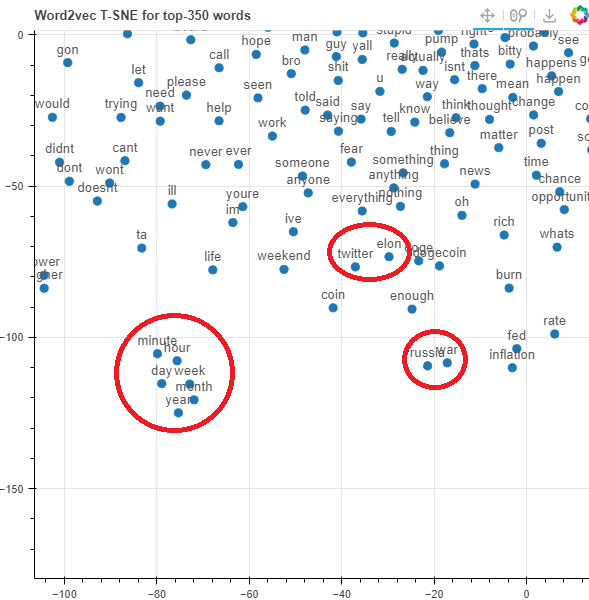

### Продолжим обучение

In [16]:
X_train = np.array(df_train.text_lemmatized.tolist())
X_test = np.array(df_test.text_lemmatized.tolist())

In [17]:
y_train = np.array(df_train.label.tolist())
y_test = np.array(df_test.label.tolist()) 

In [86]:
print ("total train examples %s" % len(y_train))
print ("total test examples %s" % len(y_test))

total train examples 928801
total test examples 398058


In [87]:
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(w2v.popitem()[1])

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

In [91]:
model.wv.vectors

array([[ 3.9090928e-01,  2.4813333e-01,  3.9276510e-01, ...,
        -9.2618853e-02,  7.8304015e-02, -1.0559639e+00],
       [-4.2082135e-02,  1.8487057e-02,  3.4880844e-01, ...,
        -1.4307015e+00,  6.9812536e-02, -1.5601067e-01],
       [ 5.3676295e-01, -1.0426282e+00, -4.6362382e-01, ...,
         4.9864075e-01, -4.4514835e-01, -2.5275597e-01],
       ...,
       [-1.4923269e-02,  4.6765149e-02, -2.4263892e-02, ...,
        -5.0263967e-02,  1.0240516e-02,  9.8435134e-03],
       [-2.0620633e-02,  5.0165832e-02, -3.3303627e-03, ...,
         4.8925672e-03,  3.4401242e-02,  4.0564656e-02],
       [-4.1465875e-02,  4.8790999e-02,  9.2280908e-03, ...,
        -5.6926731e-04,  6.3919790e-02,  4.3860771e-02]], dtype=float32)

In [92]:
w2v = dict(zip(model.wv.index_to_key, model.wv.vectors))

In [93]:
rfc_w2v = Pipeline([
    ("word2vec vectorizer", MeanEmbeddingVectorizer(w2v)),
    ("vectors", SVC(C=1.0, kernel='sigmoid', gamma=1))])

In [94]:
# На всей выборке обучиться не получается, ядро крашится
rfc_w2v.fit(X_train,y_train)

: 

: 

In [10]:
# Возьмем подвыборку
X_train = np.array(df_train.text_lemmatized.tolist()[:15000])
X_test = np.array(df_test.text_lemmatized.tolist()[:6500])
y_train = np.array(df_train.label.tolist()[:15000])
y_test = np.array(df_test.label.tolist()[:6500]) 

Попробуем создавать вектор текста не просто усреднением векторов слов, а усреднением взвешенных векторов с помощью TF-IDF.

In [11]:
class TfidfEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        self.word2weight = None
        self.dim = len(w2v.popitem()[1])

    def fit(self, X, y):
        tfidf = TfidfVectorizer(analyzer=lambda x: x)
        tfidf.fit(X)
        max_idf = max(tfidf.idf_)
        self.word2weight = defaultdict(
            lambda: max_idf,
            [(w, tfidf.idf_[i]) for w, i in tfidf.vocabulary_.items()])

        return self

    def transform(self, X):
        return np.array([
                np.mean([self.word2vec[w] * self.word2weight[w]
                         for w in words if w in self.word2vec] or
                        [np.zeros(self.dim)], axis=0)
                for words in X
            ])

In [12]:
w2v = dict(zip(model.wv.index_to_key, model.wv.vectors))

In [13]:
w2v_tfifd = Pipeline([
    ("word2vec tf-idf", TfidfEmbeddingVectorizer(w2v)),
    ("svc", SVC(C=1.0, kernel='linear', gamma=1, probability = True))])

In [14]:
w2v_tfifd.fit(X_train,y_train)

In [ ]:
train_pred = w2v_tfifd.predict(X_train)

In [ ]:
probs = w2v_tfifd.predict_proba(X_train)

In [ ]:
test_pred = w2v_tfifd.predict(X_test)

In [ ]:
f1_score(y_train, train_pred, average='micro')

0.4165

In [ ]:
print("Precision: {0:6.2f}".format(precision_score(y_test, test_pred, average='micro')))
print("Recall: {0:6.2f}".format(recall_score(y_test, test_pred, average='micro')))
print("F1-measure: {0:6.2f}".format(f1_score(y_test, test_pred, average='micro')))

print(classification_report(y_test, test_pred))

Precision:   0.42
Recall:   0.42
F1-measure:   0.42
Accuracy:   0.42
              precision    recall  f1-score   support

           0       0.10      0.12      0.11      1074
           1       0.40      0.35      0.37      4913
           2       0.49      0.53      0.51      6013

    accuracy                           0.42     12000
   macro avg       0.33      0.33      0.33     12000
weighted avg       0.42      0.42      0.42     12000



<function sklearn.metrics._classification.classification_report(y_true, y_pred, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')>

In [ ]:
print(f"ROC-AUC score (test): {roc_auc_score(y_test, svm2.predict_proba(Xpca_test), multi_class='ovr')}")

In [ ]:
# train
roc_auc_score(y_train2, svm2.predict_proba(Xpca), multi_class='ovr')